# Day 7 머신러닝(2)

## numpy / pandas

- numpy 불러오기 : import numpy as np
- pandas 불러오기 : import pandas as pd

In [3]:
import numpy as np
import pandas as pd

In [4]:
# np.random.randn: 가우시안 정규분포 난수
s = pd.Series(data=np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])
s

a    1.107050
b    1.004430
c   -0.090765
d    0.032895
e   -0.525745
dtype: float64

In [5]:
# 0.21보다 작고 -2.0보다 큰 숫자 슬라이싱
cond1 = s < 0.21
cond2 = s > -2.0
s[cond1 & cond2]

c   -0.090765
d    0.032895
e   -0.525745
dtype: float64

In [6]:
s.describe() #전체적인 통계를 볼때

count    5.000000
mean     0.305573
std      0.716466
min     -0.525745
25%     -0.090765
50%      0.032895
75%      1.004430
max      1.107050
dtype: float64

- 백터일때는 따로 축 표시 x / 백터 = list 형태여서 축 표기 안함
- min / max => 차원이 줄어든다. ex) matrix => vetor / 백터에서 min/max 하면 스칼라로 된다.
- 2D일때는 min/max하면 col,row 값이 다르기 때문에 축 표시

## Data frame
- data frame = 첫번째는 데이터 양 / 두번째는 데이터 컬럼

In [7]:
data = {
    "one": pd.Series([1.0, 2.0, 3.0], index=["a", "b", "c"]),
    "two": pd.Series([1.0, 2.0, 3.0, 4.0], index=["a", "b", "c", "d"]),
}

df = pd.DataFrame(data=data)
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [8]:
df.shape

(4, 2)

In [9]:
df['one'] #one col가져오기

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

In [10]:
df['three'] = df['one']+df['two'] 
#col 추가 / 더하기 연산에서 숫자가 없어서 d열에는 nan값이 나옴
df

,one,two,three
a,1.0,1.0,2.0
b,2.0,2.0,4.0
c,3.0,3.0,6.0
d,NaN,4.0,NaN


In [11]:
# one: 2보다 크거나 같고
cond1 = df['one']>=2
# three: 6보다 작은 데이터 조회
cond2 = df['three'] < 6

cond = cond1 & cond2
cond

df[cond] # 데이터화

,one,two,three
b,2.0,2.0,4.0


- !pip install seaborn #jupyter에서 install

# Data 선택

In [1]:
import seaborn as sns

iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
cond = iris['petal_length'].isin([1.4,1.3])
#1.4 ,1.3이 petal_length col안에 있는지 없는지 확인할 때 - isin 사용해서 풀기
iris[cond]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
6,4.6,3.4,1.4,0.3,setosa
8,4.4,2.9,1.4,0.2,setosa
12,4.8,3.0,1.4,0.1,setosa
16,5.4,3.9,1.3,0.4,setosa
17,5.1,3.5,1.4,0.3,setosa
28,5.2,3.4,1.4,0.2,setosa


In [3]:
iris[~cond] #데이터화
# ~cond 결과값이 다름.

,sepal_length,sepal_width,petal_length,petal_width,species
3,4.6,3.1,1.5,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
7,5.0,3.4,1.5,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa
10,5.4,3.7,1.5,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
iris[['petal_length']] #dataframe 형태로 뽑기

,petal_length
0,1.4
1,1.4
2,1.3
3,1.5
4,1.4
...,...
145,5.2
146,5.0
147,5.2
148,5.4


In [5]:
iris.tail() #맨 마지막에서 5개 뽑기

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [6]:
iris.iloc[-1] #마지막 데이터 가져오기

sepal_length          5.9
sepal_width           3.0
petal_length          5.1
petal_width           1.8
species         virginica
Name: 149, dtype: object

In [7]:
iris.iloc[[1,2,-1]] #데이터를 여러개 불러올 수 있다.

,sepal_length,sepal_width,petal_length,petal_width,species
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
149,5.9,3.0,5.1,1.8,virginica


In [8]:
iris.iloc[[1,2,-1]]

,sepal_length,sepal_width,petal_length,petal_width,species
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
149,5.9,3.0,5.1,1.8,virginica


In [ ]:
iris.loc[[0,1],['sepal_length']] 
#index값이 아닌 index의 위치 정보(실제값 입력 : row의 실제값, col의 실제값)로 조회해야함. row / col

In [ ]:
iris.loc[-1] #error

### 문제

In [12]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [18]:
# 1. species 값이 setosa
# 2. petal_length가 1.4 또는 1.5 또는 1.3
# 3. sepal_length가 5.0보다 크거나 같음

iris1 = iris['species'] == 'setosa'
iris2 = iris['petal_length'].isin([1.4, 1.5, 1.3])
iris3 = iris['sepal_length'] >= 5.0

result = iris1 & iris2 & iris3
iris.loc[result]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
7,5.0,3.4,1.5,0.2,setosa
10,5.4,3.7,1.5,0.2,setosa
15,5.7,4.4,1.5,0.4,setosa
16,5.4,3.9,1.3,0.4,setosa
17,5.1,3.5,1.4,0.3,setosa
19,5.1,3.8,1.5,0.3,setosa
21,5.1,3.7,1.5,0.4,setosa
27,5.2,3.5,1.5,0.2,setosa


In [14]:
# 1. species 값이 setosa이면서
# 2. petal_length가 1.4 또는 1.5 또는 1.3 포함되지 않고
# 3. 또는 sepal_length가 5.0보다 크거나 같음

cond1 = iris['species'] == 'setosa'
cond2 = iris['petal_length'].isin([1.4,1.5,1.3])
cond2_1 = ~cond2
cond3 = iris['sepal_length'] >= 5.0

result = (cond1 & cond2_1) | cond3
iris.loc[result]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
7,5.0,3.4,1.5,0.2,setosa
10,5.4,3.7,1.5,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [15]:
# 검증로직

# 1. species 값이 setosa아닌 데이터 찾기
# or
# 2. petal_length가 1.4 또는 1.5 또는 1.3 아닌 데이터 찾기
# or
# 3. 또는 sepal_length가 5.0보다 크거나 같음가 아닌 데이터 찾기

# df_iris # 위의 조건을 적용했을 때, 데이터가 없으면 true

iris1 = iris['species'] == 'setosa'
iris2 = iris['petal_length'].isin([1.4, 1.5, 1.3])
iris3 = iris['sepal_length'] >= 5.0

result = iris1 & iris2 & iris3
df = iris.loc[result]
df.loc[~iris1|~iris2|~iris3].shape

(0, 5)

In [16]:
# 1. species 값이 setosa이면서
# 2. petal_length가 1.4 또는 1.5 또는 1.3 포함되지 않고
# 3. 또는 sepal_length가 5.0보다 크거나 같음

cond1 = iris['species'] == 'setosa'
cond2 = iris['petal_length'].isin([1.4,1.5,1.3])
cond2_1 = ~cond2
cond3 = iris['sepal_length'] >= 5.0

result = (cond1 & cond2_1) | cond3
df2 = iris.loc[result]
df2.loc[~cond1&~cond2&~cond3].shape

(0, 5)

***
## pandas 심화

<data frame에 nun이 있는지 확인 할 때>
```py
df.insull()
```
<컬럼별로 null 확인>
```py
df.isnull().sum()
```
sum을 하면 차원이 줄어든다.숫자만큼 null이 발생

<전체 데이터에서 null개수가 몇%인지 확인>
```py
# 1.컬럼별 null 수
# 2.전체 데이터 수 -> shape[0]
# 3.컬럼별 null 비율 = (1번/2번)*100

(df.isnull().sum()/df.shape[0])*100
```

<전체 null 확인>
```py
df.isnull().sum().sum()
```

<전체 데이터 확인>
```py
df.info()
```
- non-null / data type(Dtype) 등 알 수 있다.

In [32]:
import seaborn as sns

df = sns.load_dataset('titanic') # 타이타닉 데이터 받아오기

In [33]:
df.isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [34]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [35]:
df.isnull().sum().sum()

869

In [36]:
df.info() #데이터의 수량, 차원, 컬럼 수, 데이터 타입

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [37]:
df.shape

(891, 15)

In [38]:
df.shape[0]

891

In [40]:
# 1.컬럼별 null 수
# 2.전체 데이터 수 -> shape[0]
# 3.컬럼별 null 비율 = (1번/2번)*100

(df.isnull().sum()/df.shape[0])*100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

***
## 통계

<숫자와 문자를 분리 => select_dtypes>
```py
df_number = df.select_dtypes(include=np.number) 
#숫자를 포함 데이터 추출 (min.max,mean,표준편차 등 가능)
df_object = df.select_dtypes(exclude=np.number) 
#문자데이터 추출 (빈도수,채빈값(카테고리 경우),unique,nunique)
```
include : int, float etc.<br>
exclude : object, str

분산 : 흩어진 정도

In [41]:
df_number = df.select_dtypes(include=np.number)
df_object = df.select_dtypes(exclude=np.number)

In [42]:
df_number.shape # (로우, 컬럼) 컬럼만 필터링 된다.

(891, 6)

In [43]:
df_number['age'].median() # Series의 통계값을 얻을 수 있음

28.0

In [44]:
df_number.mean() # DataFrame에서 사용하면 컬럼별 통계값을 얻을 수 있음

survived     0.383838
pclass       2.308642
age         29.699118
sibsp        0.523008
parch        0.381594
fare        32.204208
dtype: float64

***
## value_counts()

- object, category 일 경우 사용

In [46]:
df_object['class'].value_counts() #value의 각각의 개수

class
Third     491
First     216
Second    184
Name: count, dtype: int64

***
## unique(), nunique()

- unique() = set()과 비슷
- nunique() = number unique = unique한 개수

In [47]:
df_object['class'].unique()

['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']

In [48]:
df_object['class'].nunique()

3

***
## descirbe()

<unique  / top / freq : 문자형으로 뽑힌다.>
- top : 채빈값 / 숫자로 뽑을 수 없다. 문자로
- freq : 빈도 수 

숫자형 따로 / 문자형 따로 끊어서 보기<br>
df.describe(include=np.number) # 수에 대한 통계값들
df.describe(exclude=np.number) #카테고리 대한 통계값

왜곡되는 데이터로 median을 많이 사용


In [49]:
df.describe(include='all') # 수 & 카테고리 데이터 전부에 대한 통계값들

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


***
## map()

x값의 value와 y의 index값이 같을 때 치환된다.
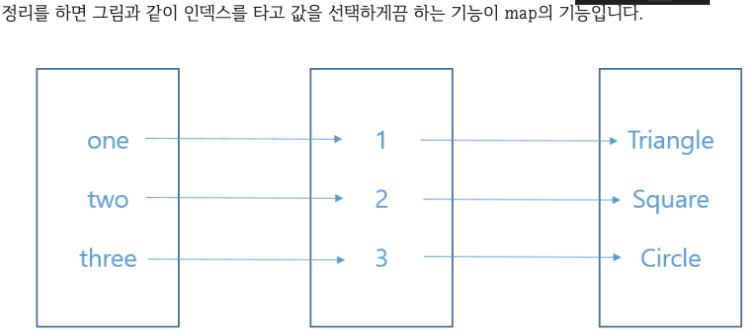

- series에서만 작동

In [51]:
x = pd.Series({'one':1,'two':2,'three':3})
y = pd.Series({1:'triangle',2:'square',3:'circle'})

In [52]:
x

one      1
two      2
three    3
dtype: int64

In [53]:
y

1    triangle
2      square
3      circle
dtype: object

In [54]:
x.map(y)

one      triangle
two        square
three      circle
dtype: object

In [55]:
y.map(x)

1   NaN
2   NaN
3   NaN
dtype: float64

In [56]:
# 1.
replace_dict = {"male":1, "female":0} 
#데이터 재정의를 안해서 아래 데이터값을 불러오면 원래값으로 결과값이 나온다.
df['sex'].map(replace_dict)[:5]

0    1
1    0
2    0
3    0
4    1
Name: sex, dtype: int64

In [61]:
df['sex'][:5]

0      male
1    female
2    female
3    female
4      male
Name: sex, dtype: object

In [57]:
df_tmp = sns.load_dataset('titanic')
df_tmp.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [60]:
# 2.
df_tmp['sex'] = df_tmp['sex'].map(lambda x: replace_dict[x])

df_tmp['sex'][:5]

0    1
1    0
2    0
3    0
4    1
Name: sex, dtype: int64

In [62]:
# 3.
df['sex'].map(lambda value: 1 if value == 'male' else 0)[:5]

0    1
1    0
2    0
3    0
4    1
Name: sex, dtype: int64

In [73]:
#  문제
# 1. True -> adult이면 0  / False -> child이면 1
# 2. 'is_child' 해당 데이터 적용

df['adult_male']

0       True
1      False
2      False
3      False
4       True
       ...  
886     True
887    False
888    False
889     True
890     True
Name: adult_male, Length: 891, dtype: bool

In [85]:
df['is_child'] = df['adult_male'].map(lambda x: 0 if x else 1)
df[['is_child','adult_male']].head()

,is_child,adult_male
0,0,True
1,1,False
2,1,False
3,1,False
4,0,True


***
## apply()
-matrix로 처리하고 싶을 때
-series 적용
-dataframe에서도 적용가능

<합계><br>
-column : axis = 0 생략되어있음 (serise여서 (vetor)따로 축이 필요하지 않아서 따로 표기x)
```py
df_tmp.apply(lambda x:x.sum()) # column 합계
```
-row : axis = 1로 표시하면 row로 처리
```py
df_tmp.apply(lambda x:x.sum(), axis=1) # row 합계
```
```py
df_tmp['row_sum'] = df_tmp.apply(lambda x:x.sum(), axis=1)
```
-a+2 컬럼에 a데이터에서 +2를 하고싶을 때 : 컬럼명 +더하고싶은 숫자
```py
df_tmp['a+2'] = df_tmp.apply(lambda x:x['a']+2, axis=1)
```

<함수를 이용해서 합계 사용 (새로운 col에 다른 n개의 col데이터의 합계를 넣을 때)>
```py
def tmpFnc(a,b):
  return a+b

df_tmp['a+b'] = df_tmp.apply(lambda x:tmpFnc(x['a'], x['b']), axis=1)
```



In [89]:
df_tmp = pd.DataFrame(np.arange(12).reshape(4,3),columns=['a','b','c'])
df_tmp

,a,b,c
0,0,1,2
1,3,4,5
2,6,7,8
3,9,10,11


In [90]:
df_tmp['a'].apply(lambda x:x*2) # Series에 적용

0     0
1     6
2    12
3    18
Name: a, dtype: int64

In [91]:
df_tmp['a'].map(lambda x:x*2)

0     0
1     6
2    12
3    18
Name: a, dtype: int64

In [92]:
df_tmp.apply(lambda x:x.sum()) # column 합계

a    18
b    22
c    26
dtype: int64

In [93]:
df_tmp.apply(lambda x:x.sum(), axis=1) # row 합계

0     3
1    12
2    21
3    30
dtype: int64

In [ ]:
# 2개의 col을 더해서 새로운 col에 추가하고싶을 때
def tmpFnc(a,b):
  return a+b

df_tmp['a+b'] = df_tmp.apply(lambda x:tmpFnc(x['a'], x['b']), axis=1)
df_tmp 

In [95]:
# 문제
df1 = sns.load_dataset('titanic')
df1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [111]:
# 'group_number' = sibsp + parch

def tmpFnc(a,b):
    return a+b

df1['group_number'] = df1.apply(lambda x:tmpFnc(x['sibsp'], x['parch']), axis=1)
df1['group_number'].head()

0    1
1    1
2    0
3    1
4    0
Name: group_number, dtype: int64

In [130]:
# 2. 문제
# sex값이 male 이면서 who값이 man이면, True
# sex값이 female 이면서 who값이 woman이면, True
# 그외는 False
# 'is_gender'에 해당 결과저장

def sex_is(a,b):
    return a+b

    if a == 'male'&'man':
        print('True')
    elif a == 'female'&'woman':
        print('True')
    else:
        print('False')
df['is_gender'] = df.apply(lambda x:sex_is( x['sex'], x['who']), axis = 1)
df


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,is_child,is_gender
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0.0,maleman
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1.0,femalewoman
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1.0,femalewoman
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1.0,femalewoman
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0.0,maleman
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,NaN,maleman
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,NaN,femalewoman
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,NaN,femalewoman
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,NaN,maleman


***
## 집합

<pivot_table><br>
: col/ row /value값을 재정의할 수 있다.<br>
pd.pivot_table(df_groupby, index='sex', columns='pclass', values='age', aggfunc='mean')


In [124]:
select_cols = ['age', 'sex', 'pclass', 'fare', 'survived']
df_groupby = df[select_cols]
df_groupby.head()

,age,sex,pclass,fare,survived
0,22.0,male,3,7.2500,0
1,38.0,female,1,71.2833,1
2,26.0,female,3,7.9250,1
3,35.0,female,1,53.1000,1
4,35.0,male,3,8.0500,0


In [125]:
# 1. sex값이 femlae
c1= df_groupby['sex'] == 'female'
# 2. pclass값이 3
c2 = df_groupby['pclass'] == 3
c = c1 & c2
# 3. 이 조건이 참인 경우의 age평균값
df_groupby.loc[c]['age'].mean()


21.75

In [126]:
pd.pivot_table(df_groupby, index='sex', columns='pclass', values='age', aggfunc='max') #최대나이

pclass,1,2,3
sex,,,
female,63.0,57.0,63.0
male,80.0,70.0,74.0


In [127]:
pd.pivot_table(df_groupby, index='sex', columns='pclass', values='age', aggfunc='mean') #어린사람나이

pclass,1,2,3
sex,,,
female,34.611765,28.722973,21.750000
male,41.281386,30.740707,26.507589


***
## groupby
-grouped -> data frame<br>
-get_group()

In [131]:
grouped = df_groupby.groupby(['sex'])

In [132]:
for i in grouped:
  print(type(i))

<class 'tuple'>
<class 'tuple'>


In [133]:
df_groupby['sex'].unique()

array(['male', 'female'], dtype=object)

***
## agg
: 총합과 평균을 구할 때

-lambda 가능
-함수를 넣을 수 있다.

In [134]:
grouped.agg(['min', 'max'])

age       pclass      fare           survived    
         min   max    min max   min       max      min max
sex                                                       
female  0.75  63.0      1   3  6.75  512.3292        0   1
male    0.42  80.0      1   3  0.00  512.3292        0   1

In [136]:
agg_dict = {
    'fare': ['min', 'max'],
    'age': 'mean'
}

agg_dict
grouped.agg(agg_dict)
# 특정 col별로 해당 통계값 구할 수 있다.

fare                  age
         min       max       mean
sex                              
female  6.75  512.3292  27.915709
male    0.00  512.3292  30.726645

In [137]:
def min_max(x):
  return x.max() - x.min()

grouped.agg(min_max)

,age,pclass,fare,survived
sex,,,,
female,62.25,2,505.5792,1
male,79.58,2,512.3292,1


In [144]:
# 문제 
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [147]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [157]:
# 1. sibsp + parch => 동반자들의 숫자(가족 수)
# 'family' => sibsp + parch

df['family'] = df.apply(lambda row: row['sibsp']+row['parch'], axis = 1)


# 2 가장 생존율이 높은 가족 숫자는?
# family로 groupby를 한다.
df.groupby(['family'])
# survived의 agg를 이용해서 평균을 구하면 = 생존률
df.groupby(['family'])['survived'].agg('mean')
# 어떤 family가 가장 높은 생존률을 갖는지 알 수 있다.
df.groupby(['family'])['survived'].agg('mean').sort_values(ascending=False).head(1).index[0]


# ascending=False => 큰것부터 정렬
# ascending=True => 작은것부터 정렬



3

In [155]:
df.groupby(['family'])['survived'].agg('mean').sort_values(ascending=False).head(1).index[0]


3

In [156]:
df.groupby(['family'])['survived'].agg('mean').sort_values(ascending=False).head(1).values[0]


0.7241379310344828